<a href="https://colab.research.google.com/github/Void-Brain70/Machine_Learning/blob/main/Batch_Gradient_Descent_vs_Strochastic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
17,1540,3,60.00
7,3300,4,155.00
3,1521,3,75.00
13,1100,2,40.00
0,1056,2,39.07


In [ ]:
from sklearn import preprocessing
x = preprocessing.MinMaxScaler()
y = preprocessing.MinMaxScaler()

scaled_x = x.fit_transform(df.drop('price',axis='columns'))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [ ]:
scaled_y = y.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [ ]:
w = np.ones(shape=(2))

In [ ]:
scaled_x.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [ ]:
np.dot(w,scaled_x.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [ ]:
def BGD(x,y_true,epoch,learning_rate=0.01s):
  number_of_fetures = x.shape[1]
 
  w = np.ones(shape = (number_of_fetures)) #initialized w1,w2,and bias to be 1
  b = 0 #1
  total_samples = x.shape[0]

  cost_list = [] 
  epoch_list = []

  for i in range(epochs):
    y_pred = np.dot(w,scaled_x.T) + b # w1*area + W2*bedrooms + bias

    w_grad = -(2/total_samples)*(x.T.dot(y_true-y_pred)) # d(error)/dw
    b_grad = -(2/total_samples)*np.sum(y_true-y_pred) # d(error)/db
    
    w = w - learning_rate * w_grad # w = w-learning rate * d(error)/dw
    b = b - learning_rate * b_grad # b = b-learning rate * d(error)/db
    
    # mean square error (error=y-y^)
    cost = np.mean(np.square(y_true-y_pred)) 
     
    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)
  
  return w, b, cost, cost_list, epoch_list    
w, b, cost, cost_list, epoch_list = BGD(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

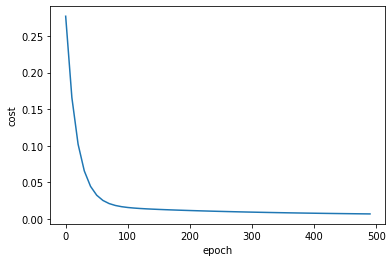

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [ ]:
y.inverse_transform([[1,0.5,0]])

array([[167. ,  99.5,  32. ]])

In [ ]:
def predict(area,bedrooms,w,b):
  scaled_x = x.transform([[area, bedrooms]])[0]
  scaled_price = w[0] * scaled_x[0] + w[1] * scaled_x[1] + b # 
  return y.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b) 

128.45484403267596

In [ ]:
predict(1000,2,w,b)

30.253094462442355

In [ ]:
import random
random.randint(0,6)

1

In [ ]:
def SGD(x,y_true,epochs,learning_rate=0.01):
  number_of_fetures = x.shape[1]

  w = np.ones(shape = (number_of_fetures))
  b = 0
  total_samples = x.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    # randomly pick a value
    random_index = random.randint(0,total_samples-1)
    
    sample_x = x[random_index]
    sample_y = y_true[random_index]
        
    y_pred = np.dot(w, sample_x.T) + b
    
    w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_pred))
    b_grad = -(2/total_samples)*(sample_y-y_pred)
        
    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad
        
    cost = np.square(sample_y-y_pred)

    if i%100 ==0:
      cost_list.append(cost)
      epoch_list.append(i)
        
  return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd  

(array([0.70592132, 0.67267818]), -0.2324144528976403, 0.0025534886052556932)

In [ ]:
w , b , cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

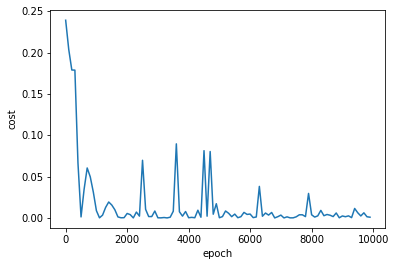

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [ ]:
predict(2600,4,w_sgd, b_sgd)

127.88405246238938